In [23]:
from keras.datasets import mnist

In [24]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [25]:
train_data #60k samples, each sample 28 by 28

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [26]:
train_data[0]#28 by 28

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [27]:
len(train_data[0])

28

In [28]:
train_labels.shape

(60000,)

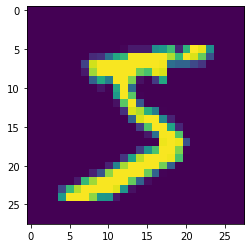

In [29]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0])
plt.show()

In [30]:
train_data.shape

(60000, 28, 28)

In [31]:
train_data[0].shape

(28, 28)

Data Reshaping 

In [32]:
train_data = train_data.reshape((60000,28 , 28, 1))
train_data = train_data.astype('float32') / 255
train_data.ndim

4

In [33]:
train_data.shape

(60000, 28, 28, 1)

In [34]:
test_data = test_data.reshape((10000, 28 , 28,1))
test_data =test_data.astype('float32') / 255

In [35]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [36]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [39]:
#model.fit(train_data, train_labels, epochs=5, batch_size=64)

In [40]:
#metrics =model.evaluate(test_data,test_labels)

In [41]:
x_valid = train_data[:25000]
x= train_data[25000:]
y_valid = train_labels[:len(x_valid)]
x= train_data[25000:]
y = train_labels[len(x):]

In [42]:
history = model.fit(train_data, train_labels, epochs=5, batch_size=64,validation_data=(x_valid,y_valid))

Epoch 1/5
938/938 [==============================] - 58s 61ms/step - loss: 0.1697 - accuracy: 0.9470 - val_loss: 0.0475 - val_accuracy: 0.9854
Epoch 2/5
938/938 [==============================] - 57s 60ms/step - loss: 0.0466 - accuracy: 0.9854 - val_loss: 0.0285 - val_accuracy: 0.9914
Epoch 3/5
938/938 [==============================] - 57s 60ms/step - loss: 0.0315 - accuracy: 0.9903 - val_loss: 0.0228 - val_accuracy: 0.9928
Epoch 4/5
938/938 [==============================] - 57s 61ms/step - loss: 0.0240 - accuracy: 0.9924 - val_loss: 0.0161 - val_accuracy: 0.9951
Epoch 5/5
938/938 [==============================] - 57s 61ms/step - loss: 0.0188 - accuracy: 0.9944 - val_loss: 0.0092 - val_accuracy: 0.9976


In [43]:
metrics =model.evaluate(test_data,test_labels)

313/313 [==============================] - 3s 10ms/step - loss: 0.0272 - accuracy: 0.9922


In [45]:
history.history

{'accuracy': [0.9470166563987732,
  0.9854166507720947,
  0.9902666807174683,
  0.9923999905586243,
  0.994350016117096],
 'loss': [0.16969917714595795,
  0.046615008264780045,
  0.031482819467782974,
  0.023977840319275856,
  0.01881849765777588],
 'val_accuracy': [0.9854000210762024,
  0.9913600087165833,
  0.9927999973297119,
  0.9951199889183044,
  0.9976000189781189],
 'val_loss': [0.04748670011758804,
  0.028531139716506004,
  0.022849543020129204,
  0.01611516997218132,
  0.009200772270560265]}

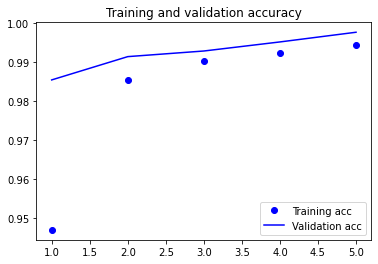

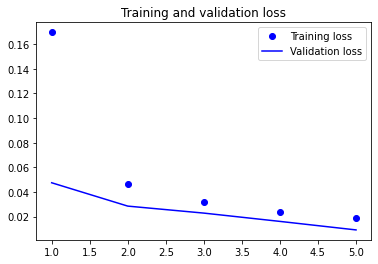

In [47]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()